In [24]:
# general analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

#cleaning data libs
from sklearn import preprocessing

# machine learn libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
# reading the dataset
df1 = pd.read_excel('Data/station.xlsx')
df1

Código Estação         Nome   Ano  Mês  Dia    Tx    Tn  Amp.     Tmedia  \
0              A912  Campo Verde  2007    1    1  27.2  20.8   6.4  23.275000   
1              A912  Campo Verde  2007    1    2  26.6  20.4   6.2  22.437500   
2              A912  Campo Verde  2007    1    3  29.5  20.3   9.2  23.640000   
3              A912  Campo Verde  2007    1    4  28.5  20.3   8.2  23.462500   
4              A912  Campo Verde  2007    1    5  26.0  20.3   5.7  21.616667   
...             ...          ...   ...  ...  ...   ...   ...   ...        ...   
5109           A912  Campo Verde  2020   12   27   NaN   NaN   NaN        NaN   
5110           A912  Campo Verde  2020   12   28   NaN   NaN   NaN        NaN   
5111           A912  Campo Verde  2020   12   29   NaN   NaN   NaN        NaN   
5112           A912  Campo Verde  2020   12   30   NaN   NaN   NaN        NaN   
5113           A912  Campo Verde  2020   12   31   NaN   NaN   NaN        NaN   

             RH  ...  Prec   Radiação     Pressão  Pt Orvalho  V. Vento  \
0     86.708333  ...   0.0  20568.550  928.579167   20.858333  4.191667   
1     87.833333  ...  11.2  15707.613  929.812500   20.216667  2.795833   
2     84.120000  ...   0.6  23700.930  929.620000   20.588000  3.354167   
3     86.500000  ...   0.4  18350.714  928.158333   20.945833  2.654167   
4     94.541667  ...  24.4   9963.907  927.295833   20.679167  4.762500   
...         ...  ...   ...        ...         ...         ...       ...   
5109        NaN  ...   NaN        NaN         NaN         NaN       NaN   
5110        NaN  ...   NaN        NaN         NaN         NaN       NaN   
5111        NaN  ...   NaN        NaN         NaN         NaN       NaN   
5112        NaN  ...   NaN        NaN         NaN         NaN       NaN   
5113        NaN  ...   NaN        NaN         NaN         NaN       NaN   

      Dir. Escalar  Raj. (max)  Dir Vetorial  Penman_1948  Penman_1956  
0       323.636560        14.3    311.447211     6.091670     5.897200  
1       332.575946        10.8    326.954648     4.844056     4.626742  
2       331.432948        11.8    316.091758     7.264090     6.937731  
3       327.382952         8.5    324.520498     5.566809     5.322933  
4       305.196805        12.9    306.914594     3.564105     3.413834  
...            ...         ...           ...          ...          ...  
5109           NaN         NaN           NaN          NaN          NaN  
5110           NaN         NaN           NaN          NaN          NaN  
5111           NaN         NaN           NaN          NaN          NaN  
5112           NaN         NaN           NaN          NaN          NaN  
5113           NaN         NaN           NaN          NaN          NaN  

[5114 rows x 22 columns]

In [3]:
df1 = df1.dropna()
df1

Código Estação         Nome   Ano  Mês  Dia    Tx    Tn  Amp.     Tmedia  \
0              A912  Campo Verde  2007    1    1  27.2  20.8   6.4  23.275000   
1              A912  Campo Verde  2007    1    2  26.6  20.4   6.2  22.437500   
2              A912  Campo Verde  2007    1    3  29.5  20.3   9.2  23.640000   
3              A912  Campo Verde  2007    1    4  28.5  20.3   8.2  23.462500   
4              A912  Campo Verde  2007    1    5  26.0  20.3   5.7  21.616667   
...             ...          ...   ...  ...  ...   ...   ...   ...        ...   
4743           A912  Campo Verde  2019   12   27  32.5  20.2  12.3  24.887500   
4744           A912  Campo Verde  2019   12   28  29.4  20.1   9.3  24.045833   
4745           A912  Campo Verde  2019   12   29  30.0  20.6   9.4  24.254167   
4746           A912  Campo Verde  2019   12   30  31.2  20.5  10.7  25.329167   
4747           A912  Campo Verde  2019   12   31  30.2  19.6  10.6  23.429167   

             RH  ...  Prec   Radiação     Pressão  Pt Orvalho  V. Vento  \
0     86.708333  ...   0.0  20568.550  928.579167   20.858333  4.191667   
1     87.833333  ...  11.2  15707.613  929.812500   20.216667  2.795833   
2     84.120000  ...   0.6  23700.930  929.620000   20.588000  3.354167   
3     86.500000  ...   0.4  18350.714  928.158333   20.945833  2.654167   
4     94.541667  ...  24.4   9963.907  927.295833   20.679167  4.762500   
...         ...  ...   ...        ...         ...         ...       ...   
4743  70.458333  ...   3.8  20976.810  929.220833   18.645833  2.029167   
4744  79.833333  ...   0.0  19138.772  929.020833   20.112500  2.225000   
4745  76.416667  ...   0.4  18653.352  928.400000   19.512500  2.045833   
4746  70.083333  ...  22.8  19380.239  927.087500   19.262500  1.937500   
4747  84.708333  ...  19.4  16920.761  927.550000   20.525000  2.783333   

      Dir. Escalar  Raj. (max)  Dir Vetorial  Penman_1948  Penman_1956  
0       323.636560        14.3    311.447211     6.091670     5.897200  
1       332.575946        10.8    326.954648     4.844056     4.626742  
2       331.432948        11.8    316.091758     7.264090     6.937731  
3       327.382952         8.5    324.520498     5.566809     5.322933  
4       305.196805        12.9    306.914594     3.564105     3.413834  
...            ...         ...           ...          ...          ...  
4743     56.756374        11.5     73.032645     6.821978     6.368543  
4744    349.769700         9.0    347.541332     6.041655     5.684703  
4745    320.812968        12.7    324.711794     5.864035     5.529622  
4746    287.558675        11.3    290.791999     6.264768     5.853917  
4747    290.976017        15.7    297.002712     5.627014     5.305447  

[3622 rows x 22 columns]

In [4]:
# creating a lsit to delete some columns that are not useful
delete = ['Código Estação', 'Nome', 'Ano', 'Dia', 'Penman_1956', 'Amp.', 'Tmedia', 'RH', 'Prec', 'Dir. Escalar', 'Dir Vetorial']

# creating a list to rename the columns
rename = {'Mês':'Month', 'Tx':'Tmax', 'Tn':'Tmin', 'RHx':'RHmax', 'RHn':'RHmin', 'Radiação':'Radiation', 'Pressão':'Pressure', 'Pt Orvalho':'Tdew', 'V. Vento':'WindS', 'Raj. (max)': 'WindG', 'Penman_1948':'Evaporation'}

In [5]:
df1 = df1.drop(columns = delete, axis = 1)
df1

Mês    Tx    Tn   RHx   RHn   Radiação     Pressão  Pt Orvalho  \
0       1  27.2  20.8  97.0  70.0  20568.550  928.579167   20.858333   
1       1  26.6  20.4  98.0  65.0  15707.613  929.812500   20.216667   
2       1  29.5  20.3  97.0  53.0  23700.930  929.620000   20.588000   
3       1  28.5  20.3  97.0  64.0  18350.714  928.158333   20.945833   
4       1  26.0  20.3  99.0  75.0   9963.907  927.295833   20.679167   
...   ...   ...   ...   ...   ...        ...         ...         ...   
4743   12  32.5  20.2  95.0  42.0  20976.810  929.220833   18.645833   
4744   12  29.4  20.1  96.0  49.0  19138.772  929.020833   20.112500   
4745   12  30.0  20.6  96.0  53.0  18653.352  928.400000   19.512500   
4746   12  31.2  20.5  91.0  47.0  19380.239  927.087500   19.262500   
4747   12  30.2  19.6  96.0  56.0  16920.761  927.550000   20.525000   

      V. Vento  Raj. (max)  Penman_1948  
0     4.191667        14.3     6.091670  
1     2.795833        10.8     4.844056  
2     3.354167        11.8     7.264090  
3     2.654167         8.5     5.566809  
4     4.762500        12.9     3.564105  
...        ...         ...          ...  
4743  2.029167        11.5     6.821978  
4744  2.225000         9.0     6.041655  
4745  2.045833        12.7     5.864035  
4746  1.937500        11.3     6.264768  
4747  2.783333        15.7     5.627014  

[3622 rows x 11 columns]

In [6]:
df1 = df1.rename(columns = rename)
df1

Month  Tmax  Tmin  RHmax  RHmin  Radiation    Pressure       Tdew  \
0         1  27.2  20.8   97.0   70.0  20568.550  928.579167  20.858333   
1         1  26.6  20.4   98.0   65.0  15707.613  929.812500  20.216667   
2         1  29.5  20.3   97.0   53.0  23700.930  929.620000  20.588000   
3         1  28.5  20.3   97.0   64.0  18350.714  928.158333  20.945833   
4         1  26.0  20.3   99.0   75.0   9963.907  927.295833  20.679167   
...     ...   ...   ...    ...    ...        ...         ...        ...   
4743     12  32.5  20.2   95.0   42.0  20976.810  929.220833  18.645833   
4744     12  29.4  20.1   96.0   49.0  19138.772  929.020833  20.112500   
4745     12  30.0  20.6   96.0   53.0  18653.352  928.400000  19.512500   
4746     12  31.2  20.5   91.0   47.0  19380.239  927.087500  19.262500   
4747     12  30.2  19.6   96.0   56.0  16920.761  927.550000  20.525000   

         WindS  WindG  Evaporation  
0     4.191667   14.3     6.091670  
1     2.795833   10.8     4.844056  
2     3.354167   11.8     7.264090  
3     2.654167    8.5     5.566809  
4     4.762500   12.9     3.564105  
...        ...    ...          ...  
4743  2.029167   11.5     6.821978  
4744  2.225000    9.0     6.041655  
4745  2.045833   12.7     5.864035  
4746  1.937500   11.3     6.264768  
4747  2.783333   15.7     5.627014  

[3622 rows x 11 columns]

The data:
 - Tmax: Maximum temperature of the day (°C)
 - Tmin: Minimum temperature of the day (°C)
 - RHmax: Maximum relative air umidity (%)
 - RHmin: Minimum relative air umidity (%)
 - Radiation: Sun radiation measured in mJ/m².day
 - Pressure: Atmospheric pressure
 - Tdew : Temperature of the dew point (°C)
 - Wind Speed: in m/s
 - Wind Gust: in m/s
 - Evaporation: measure in mm³/day

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Tmax'}>,
        <Axes: title={'center': 'Tmin'}>],
       [<Axes: title={'center': 'RHmax'}>,
        <Axes: title={'center': 'RHmin'}>,
        <Axes: title={'center': 'Radiation'}>],
       [<Axes: title={'center': 'Pressure'}>,
        <Axes: title={'center': 'Tdew'}>,
        <Axes: title={'center': 'WindS'}>],
       [<Axes: title={'center': 'WindG'}>,
        <Axes: title={'center': 'Evaporation'}>, <Axes: >]], dtype=object)

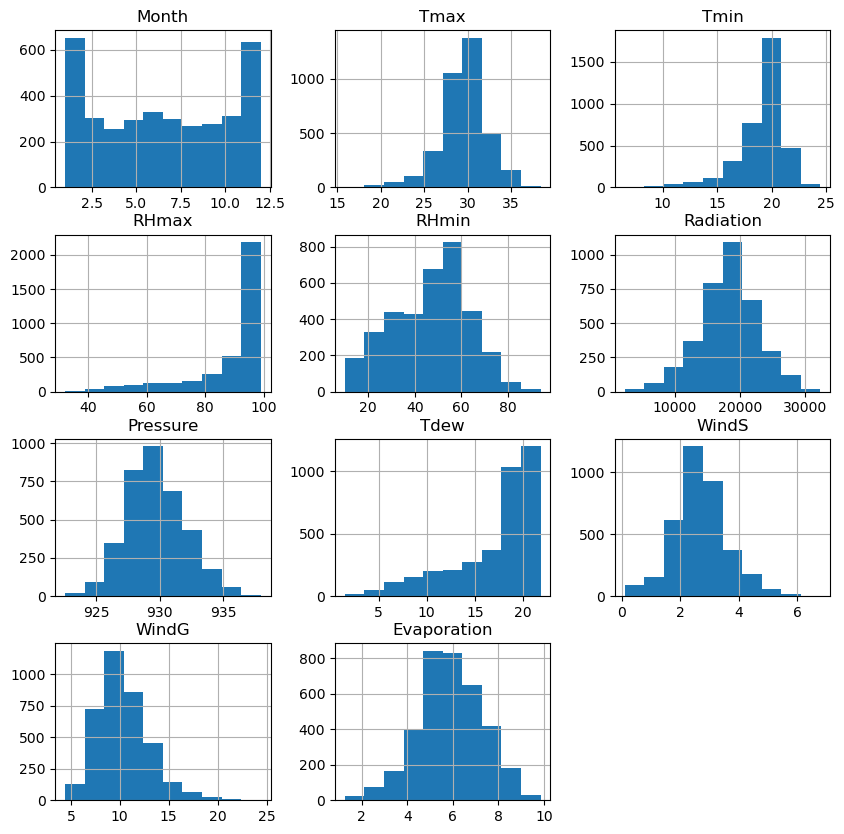

In [7]:
df1.hist(figsize=(10,10))

For the distribution:
 - Windspeed and Windgust have a relatively equal distribution
 - There are more data in January and December
 - Most of the radiation is around 20000 mJ/m.day
 - RH max (maximum relative umidity) have more counts between 80 and 100
 - for the minimum, most of the data is between 40 and 60, with low quantities in the high measures (80+)
 - Maximum temperature stands around the 30°C, while the minimum is around 20°C

In [8]:
g_month = df1.groupby('Month').mean()
g_month

Tmax       Tmin      RHmax      RHmin     Radiation    Pressure  \
Month                                                                         
1      28.573214  19.892857  95.916667  59.002976  18886.416021  928.251402   
2      29.026814  19.995899  96.082019  56.605678  18013.702129  928.555960   
3      29.433663  20.071947  95.633663  55.752475  17854.322693  928.907838   
4      28.965370  19.706615  94.638132  56.077821  17379.287058  929.697593   
5      28.119388  17.806122  90.693878  49.629252  17166.606867  931.237513   
6      28.277982  17.022324  86.504587  41.770642  16577.495847  932.192391   
7      29.069799  16.322148  75.271812  30.463087  17707.090040  932.513773   
8      31.477444  17.689098  66.541353  23.507519  18999.130271  931.425354   
9      32.477256  19.779783  72.743682  29.032491  18596.495433  930.192381   
10     31.034185  20.092971  89.495208  42.728435  18942.048681  928.590800   
11     29.513993  20.045392  94.467577  53.303754  19594.864628  927.573522   
12     28.950147  20.019062  95.302053  57.636364  19680.678378  927.722333   

            Tdew     WindS      WindG  Evaporation  
Month                                               
1      19.986875  2.819709  11.019345     5.827539  
2      19.966471  2.752431  11.066246     5.696913  
3      20.045545  2.413536  10.440924     5.548176  
4      19.560375  2.011970   8.563035     5.121669  
5      16.978825  2.187316   8.102721     4.936643  
6      14.879714  2.514982   8.696636     5.024513  
7      11.092480  2.785076   9.756711     5.768297  
8       9.623837  3.040765  10.683083     6.880779  
9      12.969333  3.179192  11.270036     7.104001  
10     18.030120  2.957080  11.870288     6.571996  
11     19.589367  2.833901  10.938908     6.244704  
12     19.967661  2.778191  10.894428     6.077550

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Month'),
  Text(1.5, 0, 'Tmax'),
  Text(2.5, 0, 'Tmin'),
  Text(3.5, 0, 'RHmax'),
  Text(4.5, 0, 'RHmin'),
  Text(5.5, 0, 'Radiation'),
  Text(6.5, 0, 'Pressure'),
  Text(7.5, 0, 'Tdew'),
  Text(8.5, 0, 'WindS'),
  Text(9.5, 0, 'WindG'),
  Text(10.5, 0, 'Evaporation')])

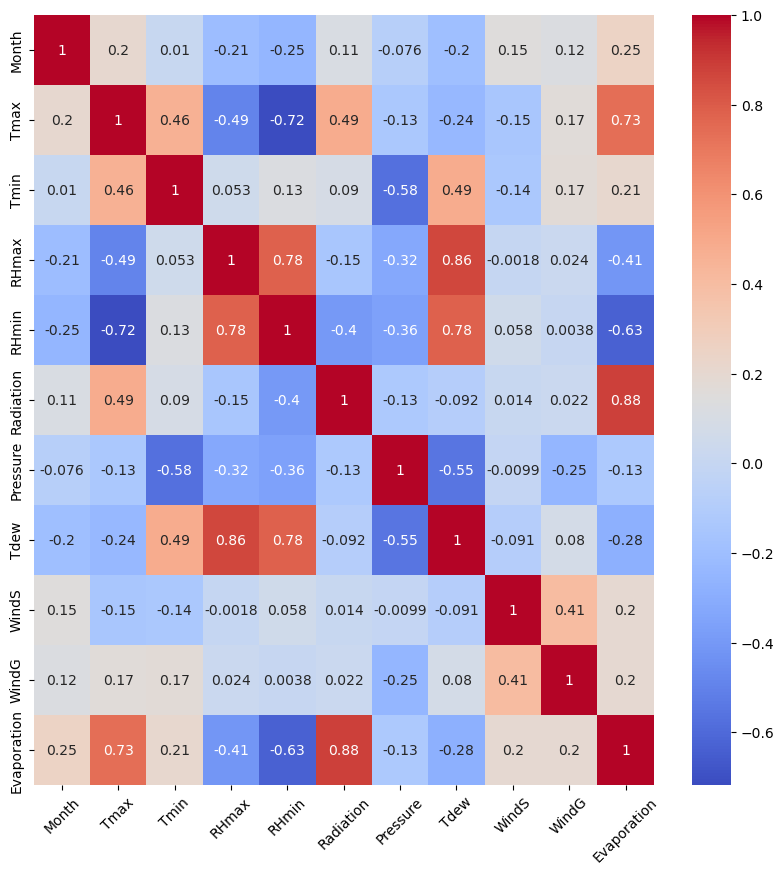

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)

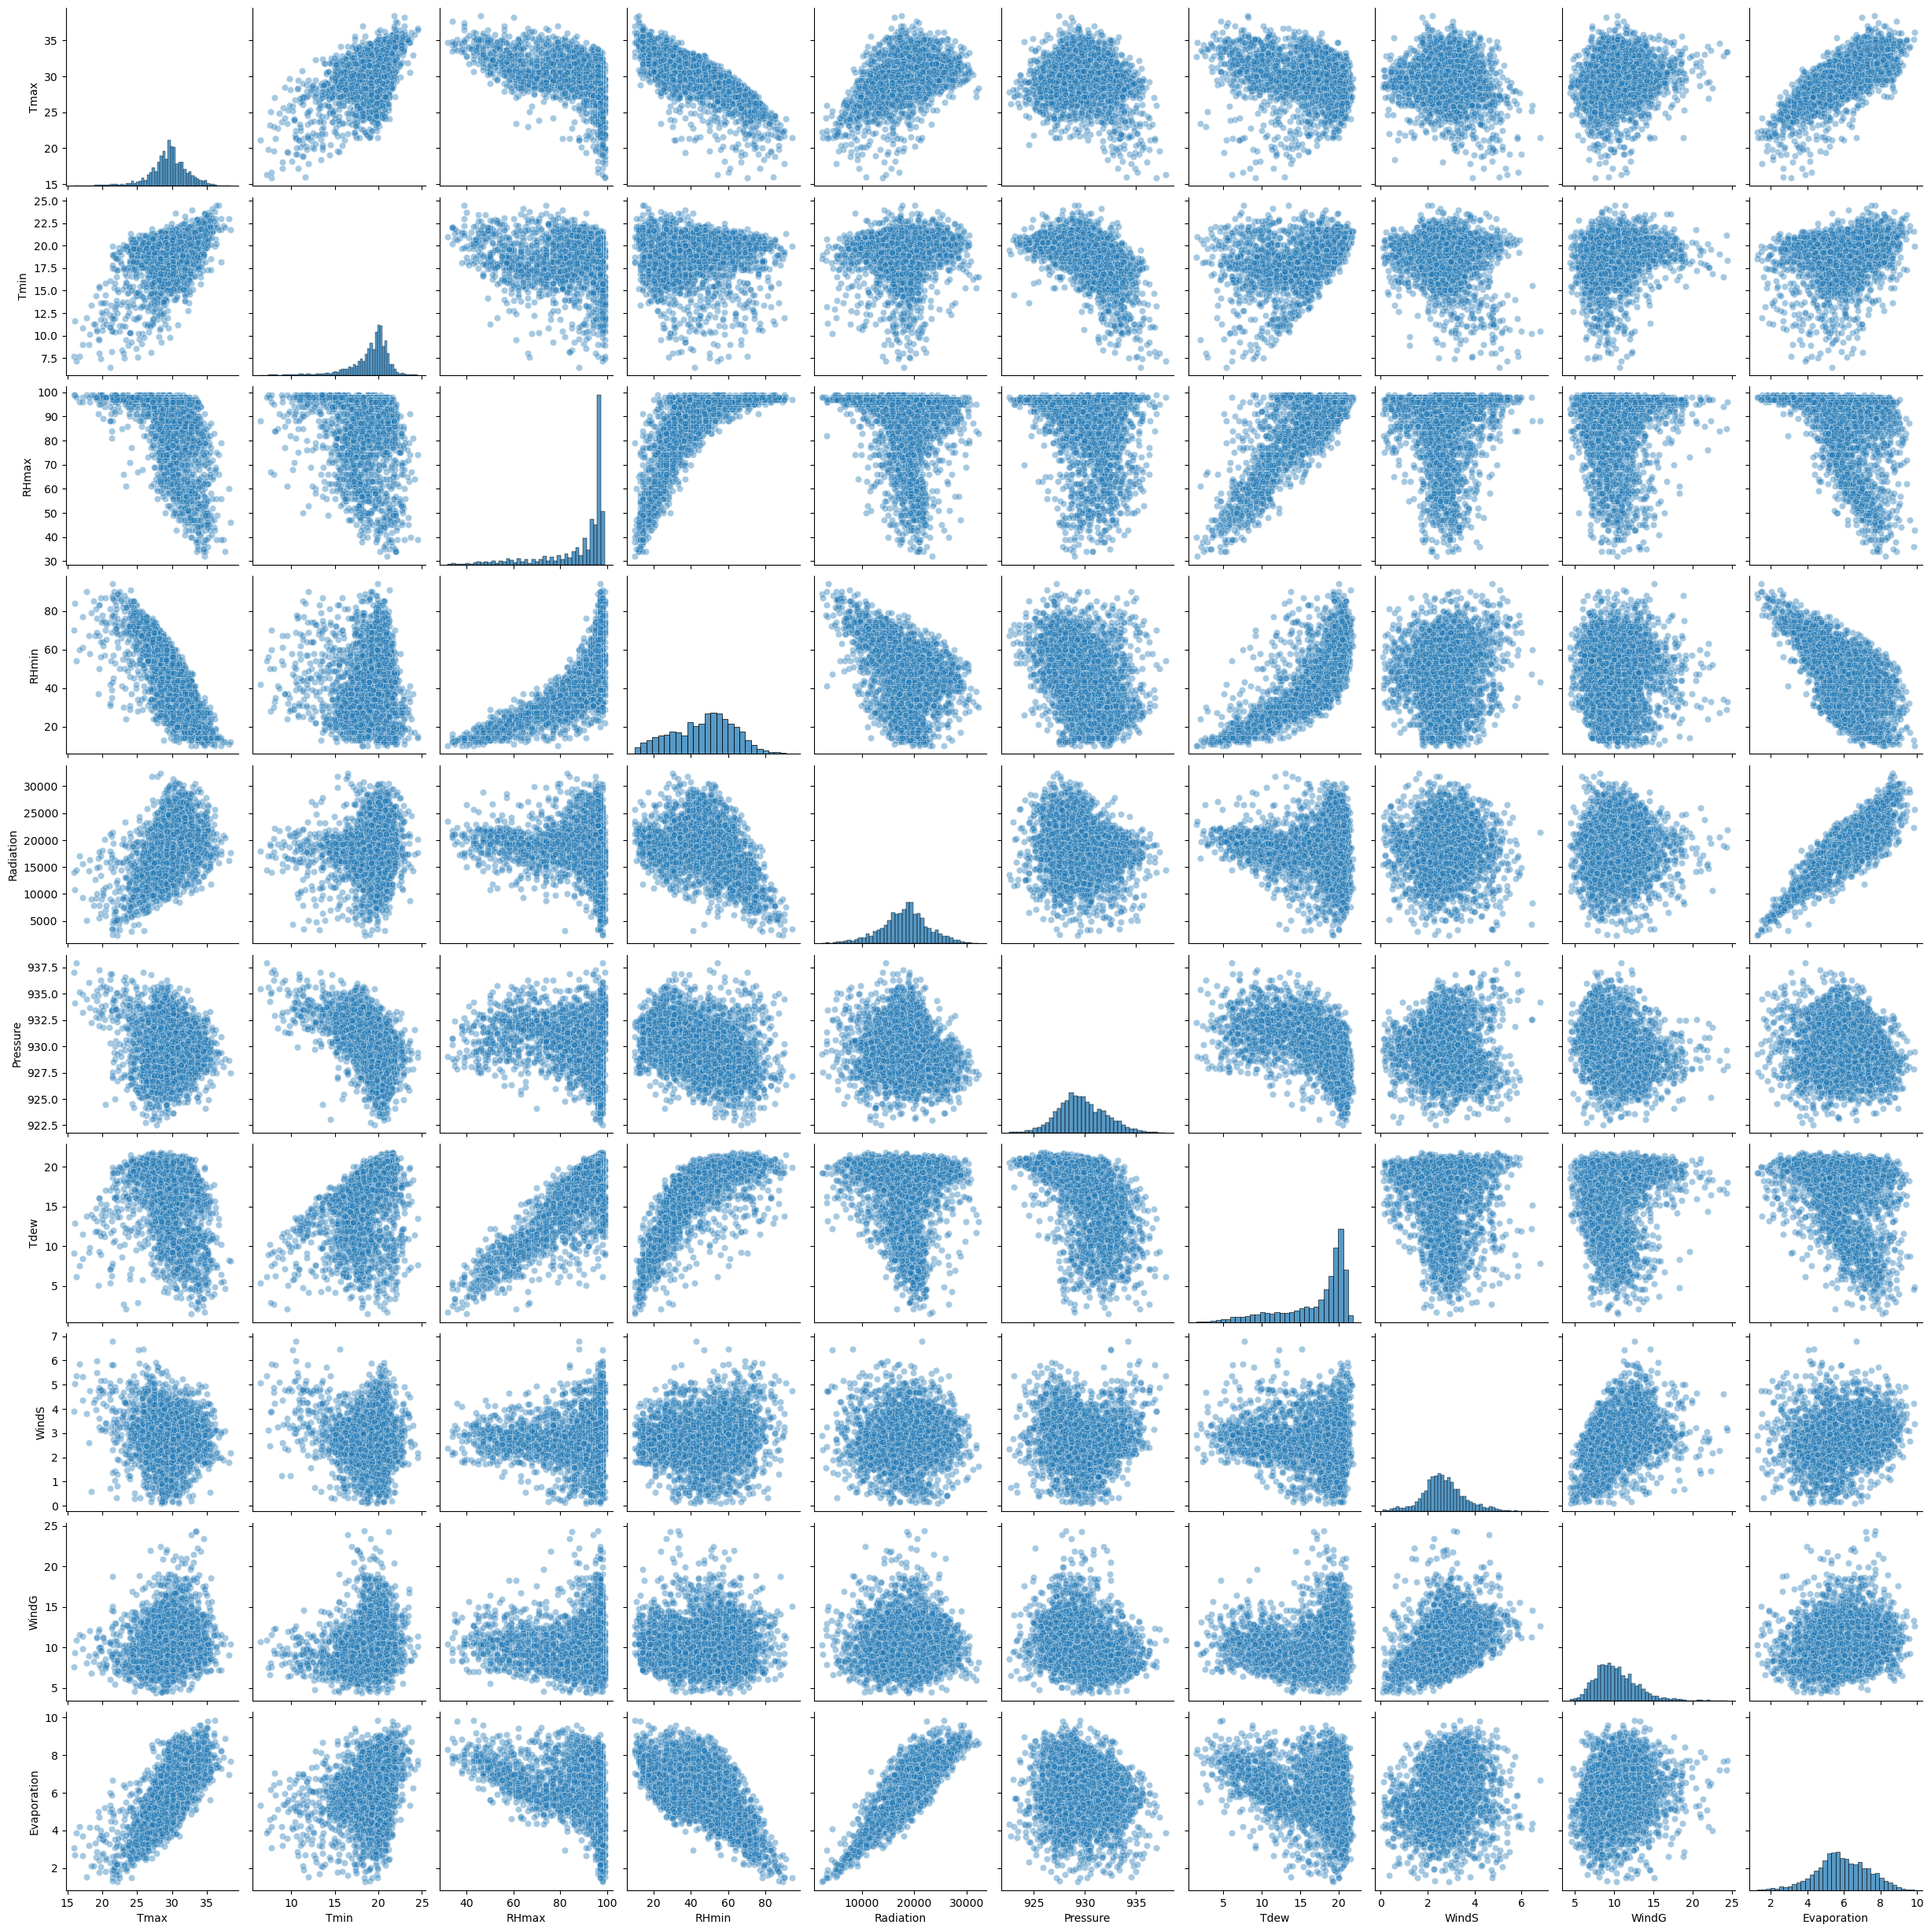

In [11]:
df_monthless = df1.drop('Month', axis = 1)

sns.pairplot(df_monthless, plot_kws={'alpha': 0.4})

In [14]:
# spliting the data_train frame into a 75/25 train/test
train, test = train_test_split(df1, test_size = 0.25, random_state = 42)

In [20]:
# removing the survided output from the test and splitting the train/validation variables
evap = test['Evaporation']
test = test.drop('Evaporation', axis = 1)

In [21]:
test.shape

(906, 10)

In [22]:
train.shape

(2716, 11)

In [30]:
# Training the model:
clf = LinearRegression().fit(test, evap)
# predictions
predict = clf.predict(test)

In [37]:
print("Coefficients: \n", clf.coef_)

Coefficients: 
 [ 1.47899601e-02  1.47878737e-01  3.59712984e-02 -4.46213158e-03
 -1.12581412e-02  2.03392203e-04 -2.56571816e-02 -1.39687081e-02
  3.57486586e-01  1.02668856e-02]


In [41]:
print(clf.coef_)
print()
print(clf.intercept_)
print()

[ 1.47899601e-02  1.47878737e-01  3.59712984e-02 -4.46213158e-03
 -1.12581412e-02  2.03392203e-04 -2.56571816e-02 -1.39687081e-02
  3.57486586e-01  1.02668856e-02]

20.96686708210168



In [44]:
# results
results = clf.predict(test)

In [50]:
results.shape

(906,)

In [53]:
# reintroducing the results and the original evaporation in the test dataframe
test['Evaporation (Original)'] = evap
test['Evaporation (ML)'] = results

test

Month  Tmax  Tmin  RHmax  RHmin  Radiation    Pressure       Tdew  \
1818     12  27.3  19.8   96.0   62.0  18092.561  929.516667  19.862500   
1532      3  26.9  19.0   97.0   69.0  10973.249  926.170833  20.162500   
1085     12  30.7  19.1   94.0   43.0  27090.915  930.716667  19.791667   
679      11  32.8  19.6   96.0   41.0  22755.458  927.100000  19.425000   
1885      2  28.4  18.9   96.0   51.0  25141.284  929.633333  18.891667   
...     ...   ...   ...    ...    ...        ...         ...        ...   
4059      2  29.3  20.5   97.0   58.0  16572.759  929.625000  20.708333   
3223     10  29.6  21.0   94.0   49.0  17690.649  928.766667  19.562500   
1424     11  28.0  20.7   94.0   60.0  16190.735  926.295833  19.966667   
1337      8  35.8  21.6   52.0   13.0  16311.024  928.450000   8.229167   
3657      1  32.5  20.0   96.0   38.0  27922.809  929.929167  19.408333   

         WindS  WindG  Evaporation (Original)  Evaporation (ML)  
1818  2.408333   13.0                5.410127          5.315369  
1532  3.954167   11.6                3.888797          4.182945  
1085  2.070833    7.9                7.905804          7.643189  
679   3.425000   13.3                7.771928          7.726177  
1885  2.083333   13.2                6.992327          6.751695  
...        ...    ...                     ...               ...  
4059  2.679167    9.4                5.370224          5.265125  
3223  2.575000    9.2                5.859792          5.786611  
1424  2.387500    9.8                5.133881          5.121973  
1337  1.850000    8.5                6.675073          6.907632  
3657  2.566667    9.7                8.595425          8.216916  

[906 rows x 12 columns]

In [61]:
# calculating the error
error = ((test['Evaporation (Original)'] - test['Evaporation (ML)']) / test['Evaporation (Original)']) * 100

# converting negative percentages
positive_error = [num if num >= 0 else -1 * num for num in error]

In [63]:
count = 0
for x in positive_error:
    if x > 10:
        count +=1
count

30

<Axes: >

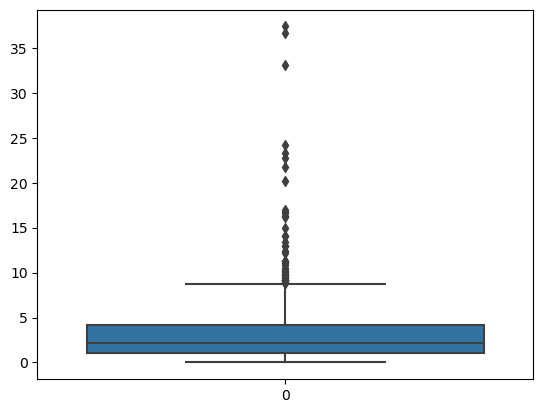

In [64]:
# boxplot ofr the error
sns.boxplot(positive_error)